### Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from pydotplus import graph_from_dot_data

### Importamos el dataset titanic para el entrenamiento

In [2]:
df = pd.read_csv('titanic_train_out.csv')

### Seleccionamos las dimenciones para entrenar y el target

In [3]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [4]:
X = df.iloc[:, [1,2,3,4,5,6,7]].values
y = df.Survived

### Separamos y_train y_test x_train y x_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Para saber que profundidad de arbol nos da un mejor resultado entrenamos el modelo para varias profundidades y comparamos

Matriz de Confusión para Profundidad 1


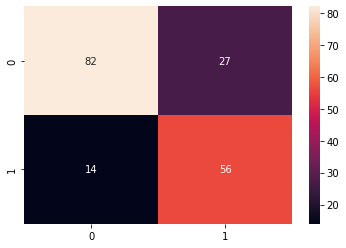

acuracy: 0.770949720670391
precision: 0.6746987951807228
recall 0.8
f1 0.7320261437908497
Matriz de Confusión para Profundidad 2


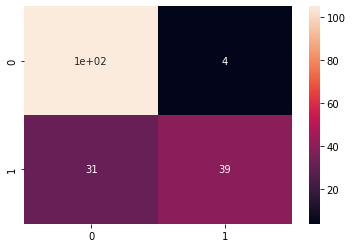

acuracy: 0.8044692737430168
precision: 0.9069767441860465
recall 0.5571428571428572
f1 0.6902654867256637
Matriz de Confusión para Profundidad 3


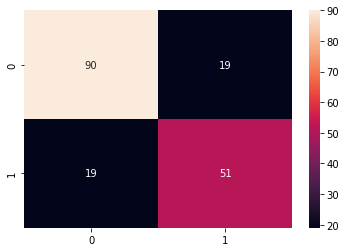

acuracy: 0.7877094972067039
precision: 0.7285714285714285
recall 0.7285714285714285
f1 0.7285714285714285
Matriz de Confusión para Profundidad 4


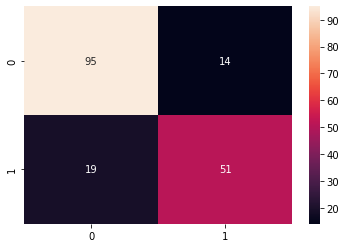

acuracy: 0.8156424581005587
precision: 0.7846153846153846
recall 0.7285714285714285
f1 0.7555555555555555
Matriz de Confusión para Profundidad 5


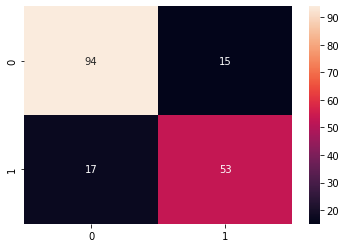

acuracy: 0.8212290502793296
precision: 0.7794117647058824
recall 0.7571428571428571
f1 0.7681159420289856


In [6]:
max_depth_range = list(range(1, 6))
for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    classifier.fit(X_train, y_train)    
    y_pred = classifier.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
    #accuracy
    print("acuracy:",accuracy_score(y_test, y_pred))
    #precision score
    print("precision:",precision_score(y_test, y_pred))
    #recall score
    print("recall" ,recall_score(y_test,y_pred))
    #F1 score
    print("f1" ,f1_score(y_test, y_pred))


### Suponiendo que el mejor resultado es el deprofundidad 4, podemos imprimir el arbol de varias maneras

In [20]:
classifier = DecisionTreeClassifier(max_depth = 5,random_state = 0)
classifier.fit(X_train, y_train)   

DecisionTreeClassifier(max_depth=5, random_state=0)

[Text(0.5208333333333334, 0.9166666666666666, 'X[5] <= 0.125\ngini = 0.472\nsamples = 712\nvalue = [440, 272]'),
 Text(0.2708333333333333, 0.75, 'X[0] <= 0.25\ngini = 0.268\nsamples = 421\nvalue = [354, 67]'),
 Text(0.15625, 0.5833333333333334, 'X[2] <= 0.644\ngini = 0.435\nsamples = 94\nvalue = [64, 30]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[2] <= 0.456\ngini = 0.474\nsamples = 75\nvalue = [46, 29]'),
 Text(0.041666666666666664, 0.25, 'X[2] <= 0.306\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.488\nsamples = 26\nvalue = [11, 15]'),
 Text(0.125, 0.25, 'X[2] <= 0.594\ngini = 0.42\nsamples = 40\nvalue = [28, 12]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.14583333333333334, 0.08333333333333333, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.22916666666666666, 0.4166

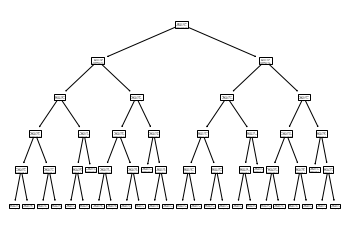

In [21]:
tree.plot_tree(classifier)

In [22]:
dot_data = export_graphviz(classifier,class_names = ['Not Survived', 'Survived'] ,filled = True, rounded = True,special_characters = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_profundidad_5.png')

True

### Importamos el dataset para predecir 

In [23]:
df_test = pd.read_csv('titanic_test_out.csv')

### Realizamos la prediccion para un data set sin los target

In [24]:
 df_test['Survived'] = classifier.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,1.0,0.0,0.447368,0.000000,1.0,0.00,1.0,0.0
1,1.0,1.0,0.618421,0.000000,0.0,0.50,0.0,0.0
2,0.5,0.0,0.815789,0.333333,1.0,0.00,1.0,0.0
3,1.0,0.0,0.355263,0.333333,0.0,0.00,1.0,0.0
4,1.0,1.0,0.289474,0.333333,0.0,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...
413,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0,0.0
414,0.0,1.0,0.513158,1.000000,0.5,1.00,1.0,1.0
415,1.0,0.0,0.500000,0.000000,0.0,0.00,1.0,0.0
416,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0,0.0


### Podemos realizar el entrenamiento con otro algoritmo para comprar las metricas por ejemplo vecinos cercanos

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(X_test)

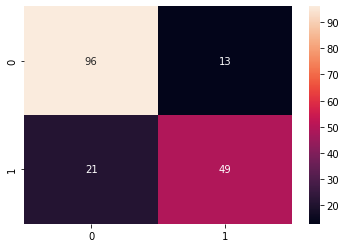

In [28]:
matriz = confusion_matrix(y_test, y_pred)
sn.heatmap(matriz,annot=True)
plt.show()

In [16]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [17]:
precision_score(y_test, y_pred)

0.7903225806451613

In [18]:
recall_score(y_test, y_pred)

0.7

In [19]:
f1_score(y_test, y_pred)

0.7424242424242423